<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/da_ce_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

<center>
<font color="#41a8c7">
<h2><b>
Caso 01 Deteccion de Anomalias Declaracion Jurada Ingresos Brutos

</font>
</center>

## Carga de librerías necesarias

### Analisis de datos

In [1]:
import numpy as np
import pandas as pd

### Modelo y preprocesamiento

### Graficos

In [2]:
import plotly.express as px
import matplotlib.pyplot as plt

## Obtención de los Datos

### Extracción de Datos - Creación del DataFrame

In [3]:
datos = "https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Modulo_12_Deteccion%20de%20Anomalias/datos01.csv"

In [4]:
df = pd.read_csv(datos, index_col=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ORIGEN                             79 non-null     object 
 1   CUIT                               79 non-null     int64  
 2   PERIODO                            79 non-null     int64  
 3   CUOTA                              79 non-null     int64  
 4   COD ACTIVIDAD                      79 non-null     int64  
 5   DESCRIPCION CODIGO PROV            79 non-null     object 
 6   ALICUOTA                           79 non-null     float64
 7   BASE IMPONIBLE                     79 non-null     float64
 8   IMPUESTO Calculado Alícuota        79 non-null     float64
 9   IMPUESTO DETERMINADO (ADIB / DIU)  79 non-null     float64
dtypes: float64(4), int64(4), object(2)
memory usage: 6.8+ KB


## Análisis Exploratorio de los Datos

###Limpieza de caracteres en el conjunto de datos

In [6]:
cleancolumn = []
for i in range(len(df.columns)):
    cleancolumn.append(df.columns[i].replace('-', '').lower())
df.columns = cleancolumn

In [7]:
df

,origen,cuit,periodo,cuota,cod actividad,descripcion codigo prov,alicuota,base imponible,impuesto calculado alícuota,impuesto determinado (adib / diu)
0,ADIB,30538596112,2015,1,631027,VTA PIZ/EMPAN/HAMB/PARRILL/BEBIDA-C/SERV.MESA,4.0,1542649.10,61705.96,61705.96
1,ADIB,30538596112,2015,2,631027,VTA PIZ/EMPAN/HAMB/PARRILL/BEBIDA-C/SERV.MESA,4.0,2826481.24,113059.24,113059.24
2,ADIB,30538596112,2015,3,631027,VTA PIZ/EMPAN/HAMB/PARRILL/BEBIDA-C/SERV.MESA,4.0,2819790.62,112791.62,112791.62
3,ADIB,30538596112,2015,4,631027,VTA PIZ/EMPAN/HAMB/PARRILL/BEBIDA-C/SERV.MESA,4.0,2904493.66,116179.74,116179.74
4,ADIB,30538596112,2015,5,631027,VTA PIZ/EMPAN/HAMB/PARRILL/BEBIDA-C/SERV.MESA,4.0,3039687.52,121587.50,121587.50
...,...,...,...,...,...,...,...,...,...,...
74,DIU,30538596112,2021,4,561019,SS DE EXPENDIO COMIDAS Y BEBIDAS EN ESTABLECIM...,2.0,11116559.12,222331.18,222331.18
75,DIU,30538596112,2021,5,561019,SS DE EXPENDIO COMIDAS Y BEBIDAS EN ESTABLECIM...,2.0,9678823.72,193576.47,193576.47
76,DIU,30538596112,2021,6,561019,SS DE EXPENDIO COMIDAS Y BEBIDAS EN ESTABLECIM...,2.0,13214299.07,264285.98,264285.98
77,DIU,30538596112,2021,7,561019,SS DE EXPENDIO COMIDAS Y BEBIDAS EN ESTABLECIM...,2.0,21268840.75,425376.82,425376.82


### Análisis descriptivo

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cuit,79.0,3.053860e+10,0.000000e+00,3.053860e+10,3.053860e+10,3.053860e+10,3.053860e+10,3.053860e+10
periodo,79.0,2.017823e+03,1.939862e+00,2.015000e+03,2.016000e+03,2.018000e+03,2.019000e+03,2.021000e+03
cuota,79.0,6.303797e+00,3.450583e+00,1.000000e+00,3.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
cod actividad,79.0,6.035595e+05,3.440556e+04,5.610190e+05,5.610190e+05,6.310270e+05,6.310350e+05,6.310350e+05
alicuota,79.0,4.205696e+00,7.749685e-01,2.000000e+00,4.250000e+00,4.500000e+00,4.500000e+00,4.750000e+00
base imponible,79.0,4.953488e+06,3.491995e+06,2.400992e+05,2.940874e+06,3.873860e+06,5.599008e+06,2.126884e+07
impuesto calculado alícuota,79.0,1.904153e+05,9.575356e+04,1.140471e+04,1.202766e+05,1.672985e+05,2.352380e+05,5.123743e+05
impuesto determinado (adib / diu),79.0,1.904153e+05,9.575356e+04,1.140471e+04,1.202766e+05,1.672985e+05,2.352380e+05,5.123743e+05


### Valores faltantes

In [9]:
df.isnull().sum()

origen                               0
cuit                                 0
periodo                              0
cuota                                0
cod actividad                        0
descripcion codigo prov              0
alicuota                             0
base imponible                       0
impuesto calculado alícuota          0
impuesto determinado (adib / diu)    0
dtype: int64

### Creación del campo fecha

In [10]:
df.cuota = df.cuota.astype(str)
df.periodo = df.periodo.astype(str)

In [11]:
df["fecha"] = df['cuota'].str.cat(df['periodo'], sep ="/") 

In [12]:
df.fecha = pd.to_datetime(df['fecha'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   origen                             79 non-null     object        
 1   cuit                               79 non-null     int64         
 2   periodo                            79 non-null     object        
 3   cuota                              79 non-null     object        
 4   cod actividad                      79 non-null     int64         
 5   descripcion codigo prov            79 non-null     object        
 6   alicuota                           79 non-null     float64       
 7   base imponible                     79 non-null     float64       
 8   impuesto calculado alícuota        79 non-null     float64       
 9   impuesto determinado (adib / diu)  79 non-null     float64       
 10  fecha                              79 no

### Ajustando el dataframe

In [14]:
df.drop(columns=["origen","cuit","periodo","cuota","cod actividad","descripcion codigo prov",
                 "alicuota","impuesto calculado alícuota","impuesto determinado (adib / diu)"], inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   base imponible  79 non-null     float64       
 1   fecha           79 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


# Dividiendo el conjunto de datos

In [16]:
datos = df.sample(frac=0.76, random_state=0)
datos_no_vistos = df.drop(datos.index)

In [17]:
datos.reset_index(inplace=True, drop=True)
datos_no_vistos.reset_index(inplace=True, drop=True)

In [18]:
print("Datos para Modelar: " + str(datos.shape))
print("Datos no vistos para Predicciones: " + str(datos_no_vistos.shape))

Datos para Modelar: (60, 2)
Datos no vistos para Predicciones: (19, 2)


# Detección de Outliers 

### Instalando PyCaret

In [19]:
!pip install --pre pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Habilitando PyCaret

In [20]:
from pycaret.anomaly import *

### Configuración inicial

In [21]:
anomalias = setup(df, 
                  normalize = True,
                  session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(79, 2)"
2,Transformed data shape,"(79, 3)"
3,Numeric features,1
4,Date features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,constant
9,Low variance threshold,0


### Modelos 

In [22]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


# Modelo SVM

In [23]:
modelo01 = create_model('svm')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [24]:
print(modelo01)

OCSVM(cache_size=200, coef0=0.0, contamination=0.05, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)


## Asignación del modelo

In [25]:
modelo01_results = assign_model(modelo01)
modelo01_results

,base imponible,fecha,Anomaly,Anomaly_Score
0,1.542649e+06,2015-01-01,0,1.963135
1,2.826481e+06,2015-02-01,0,1.041466
2,2.819790e+06,2015-03-01,0,0.495657
3,2.904494e+06,2015-04-01,0,0.168927
4,3.039688e+06,2015-05-01,0,0.000326
...,...,...,...,...
74,1.111656e+07,2021-04-01,0,2.423588
75,9.678824e+06,2021-05-01,0,1.535931
76,1.321430e+07,2021-06-01,0,3.733897
77,2.126884e+07,2021-07-01,1,8.415629


In [26]:
modelo01_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   base imponible  79 non-null     float32       
 1   fecha           79 non-null     datetime64[ns]
 2   Anomaly         79 non-null     int64         
 3   Anomaly_Score   79 non-null     float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int64(1)
memory usage: 2.3 KB


In [27]:
modelo01_results.sort_index(inplace=True)

In [28]:
modelo01_results

,base imponible,fecha,Anomaly,Anomaly_Score
0,1.542649e+06,2015-01-01,0,1.963135
1,2.826481e+06,2015-02-01,0,1.041466
2,2.819790e+06,2015-03-01,0,0.495657
3,2.904494e+06,2015-04-01,0,0.168927
4,3.039688e+06,2015-05-01,0,0.000326
...,...,...,...,...
74,1.111656e+07,2021-04-01,0,2.423588
75,9.678824e+06,2021-05-01,0,1.535931
76,1.321430e+07,2021-06-01,0,3.733897
77,2.126884e+07,2021-07-01,1,8.415629


## Graficando el modelo

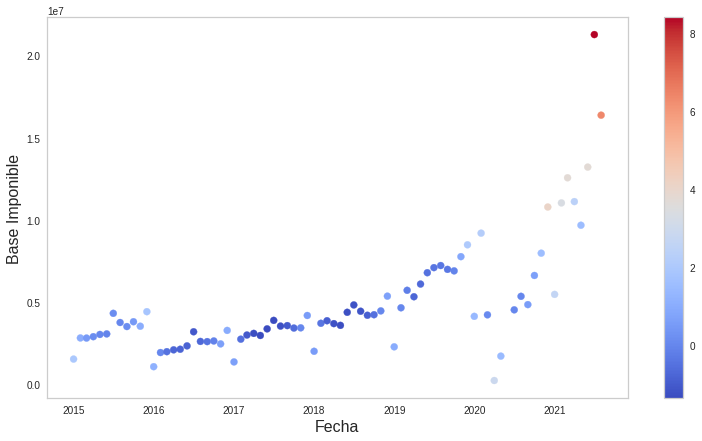

In [29]:
plt.figure(figsize = (13, 7))
s = plt.scatter(modelo01_results['fecha'], modelo01_results['base imponible'], 
                c = modelo01_results["Anomaly_Score"], cmap = 'coolwarm')
plt.colorbar(s, label = '')
plt.xlabel('Fecha', fontsize = 16)
plt.ylabel('Base Imponible', fontsize = 16)
plt.grid()

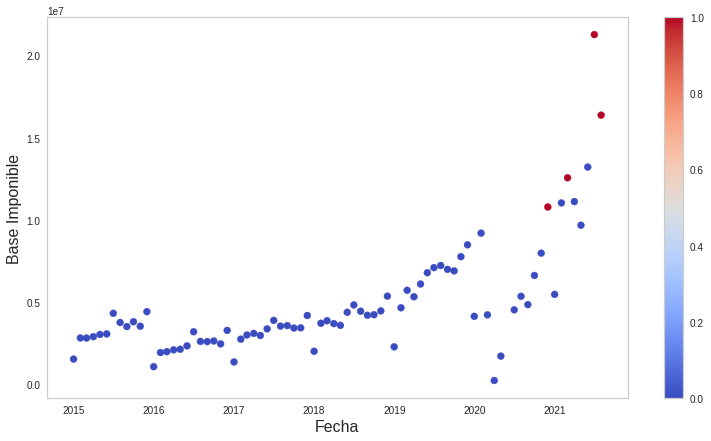

In [30]:
plt.figure(figsize = (13, 7))
s = plt.scatter(modelo01_results['fecha'], modelo01_results['base imponible'], 
                c = modelo01_results["Anomaly"], cmap = 'coolwarm')
plt.colorbar(s, label = '')
plt.xlabel('Fecha', fontsize = 16)
plt.ylabel('Base Imponible', fontsize = 16)
plt.grid()

# Modelo Cluster

In [31]:
modelo02 = create_model('cluster')
print(modelo02)
modelo02_results = assign_model(modelo02)
modelo02_results.sort_index(inplace=True)
modelo02_results

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.05, n_clusters=8, n_jobs=None, random_state=123,
   use_weights=False)


,base imponible,fecha,Anomaly,Anomaly_Score
0,1.542649e+06,2015-01-01,0,0.816535
1,2.826481e+06,2015-02-01,0,0.609312
2,2.819790e+06,2015-03-01,0,0.534507
3,2.904494e+06,2015-04-01,0,0.614523
4,3.039688e+06,2015-05-01,0,0.803913
...,...,...,...,...
74,1.111656e+07,2021-04-01,0,0.130211
75,9.678824e+06,2021-05-01,0,0.578546
76,1.321430e+07,2021-06-01,0,0.910967
77,2.126884e+07,2021-07-01,1,3.079460


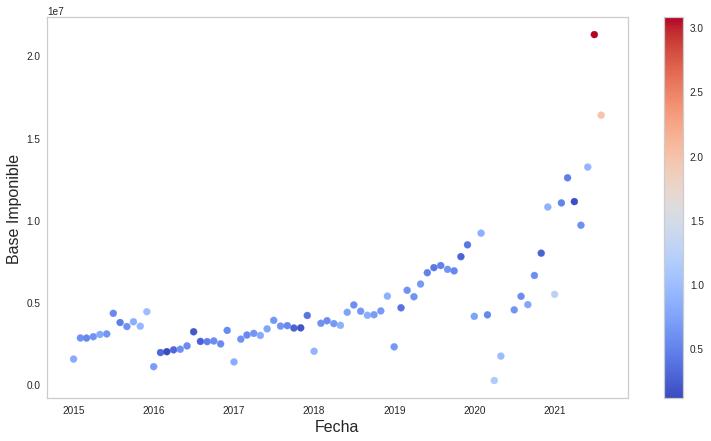

In [32]:
plt.figure(figsize = (13, 7))
s = plt.scatter(modelo02_results['fecha'], modelo02_results['base imponible'], 
                c = modelo02_results["Anomaly_Score"], cmap = 'coolwarm')
plt.colorbar(s, label = '')
plt.xlabel('Fecha', fontsize = 16)
plt.ylabel('Base Imponible', fontsize = 16)
plt.grid()

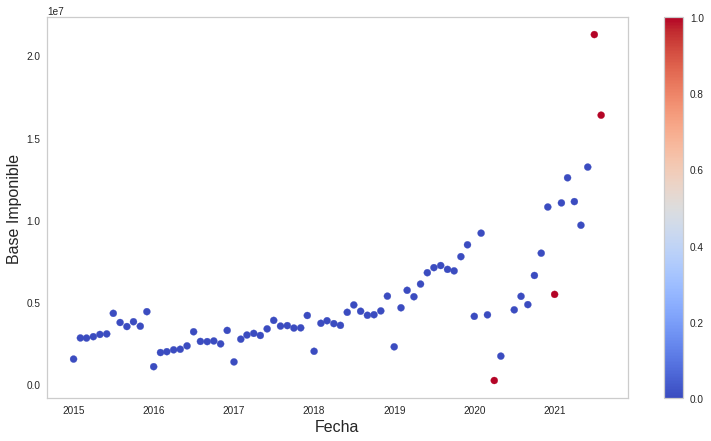

In [33]:
plt.figure(figsize = (13, 7))
s = plt.scatter(modelo02_results['fecha'], modelo02_results['base imponible'], 
                c = modelo02_results["Anomaly"], cmap = 'coolwarm')
plt.colorbar(s, label = '')
plt.xlabel('Fecha', fontsize = 16)
plt.ylabel('Base Imponible', fontsize = 16)
plt.grid()

# Modelo cof

In [34]:
modelo03 = create_model('cof')
print(modelo03)
modelo03_results = assign_model(modelo03)
modelo03_results.sort_index(inplace=True)
modelo03_results

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

COF(contamination=0.05, method='fast', n_neighbors=None)


,base imponible,fecha,Anomaly,Anomaly_Score
0,1.542649e+06,2015-01-01,0,1.000437
1,2.826481e+06,2015-02-01,0,0.994493
2,2.819790e+06,2015-03-01,0,0.965563
3,2.904494e+06,2015-04-01,0,0.961907
4,3.039688e+06,2015-05-01,0,0.967443
...,...,...,...,...
74,1.111656e+07,2021-04-01,0,1.232612
75,9.678824e+06,2021-05-01,0,1.201850
76,1.321430e+07,2021-06-01,1,1.442601
77,2.126884e+07,2021-07-01,1,1.548458


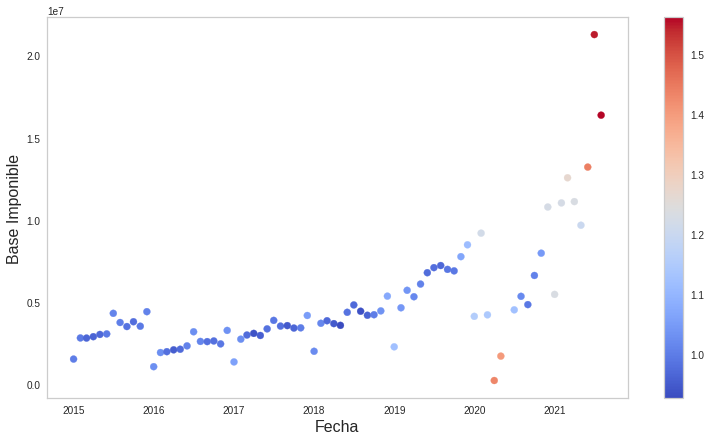

In [35]:
plt.figure(figsize = (13, 7))
s = plt.scatter(modelo03_results['fecha'], modelo03_results['base imponible'], 
                c = modelo03_results["Anomaly_Score"], cmap = 'coolwarm')
plt.colorbar(s, label = '')
plt.xlabel('Fecha', fontsize = 16)
plt.ylabel('Base Imponible', fontsize = 16)
plt.grid()

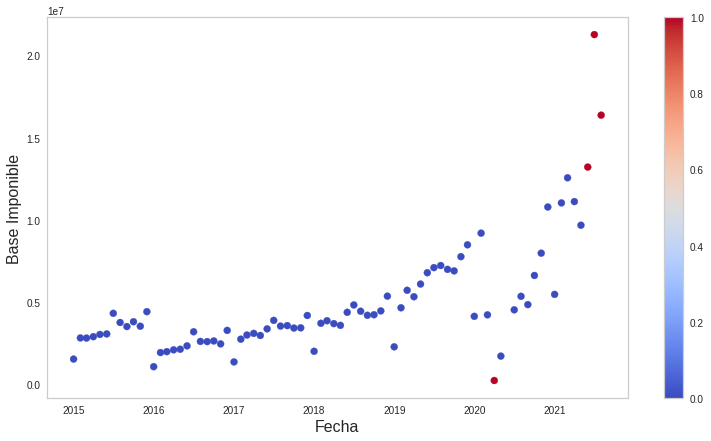

In [36]:
plt.figure(figsize = (13, 7))
s = plt.scatter(modelo03_results['fecha'], modelo03_results['base imponible'], 
                c = modelo03_results["Anomaly"], cmap = 'coolwarm')
plt.colorbar(s, label = '')
plt.xlabel('Fecha', fontsize = 16)
plt.ylabel('Base Imponible', fontsize = 16)
plt.grid()

# Modelo iforest

In [37]:
modelo04 = create_model('iforest')
print(modelo04)
modelo04_results = assign_model(modelo04)
modelo04_results.sort_index(inplace=True)
modelo04_results

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)


,base imponible,fecha,Anomaly,Anomaly_Score
0,1.542649e+06,2015-01-01,1,0.002435
1,2.826481e+06,2015-02-01,0,-0.069465
2,2.819790e+06,2015-03-01,0,-0.079041
3,2.904494e+06,2015-04-01,0,-0.084452
4,3.039688e+06,2015-05-01,0,-0.090722
...,...,...,...,...
74,1.111656e+07,2021-04-01,0,-0.053778
75,9.678824e+06,2021-05-01,0,-0.044109
76,1.321430e+07,2021-06-01,0,-0.007378
77,2.126884e+07,2021-07-01,1,0.098299


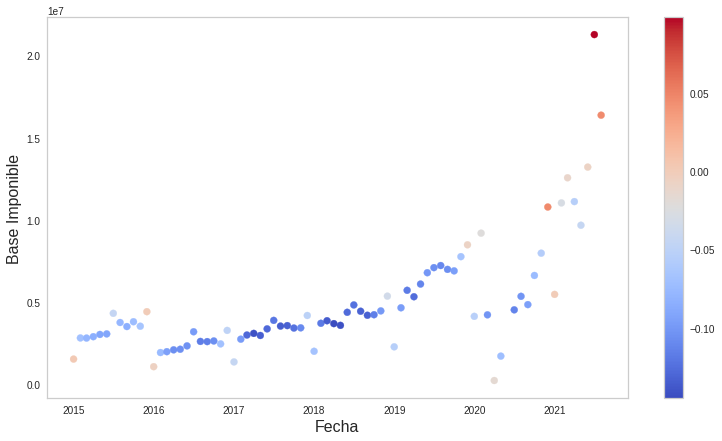

In [38]:
plt.figure(figsize = (13, 7))
s = plt.scatter(modelo04_results['fecha'], modelo04_results['base imponible'], 
                c = modelo04_results["Anomaly_Score"], cmap = 'coolwarm')
plt.colorbar(s, label = '')
plt.xlabel('Fecha', fontsize = 16)
plt.ylabel('Base Imponible', fontsize = 16)
plt.grid()

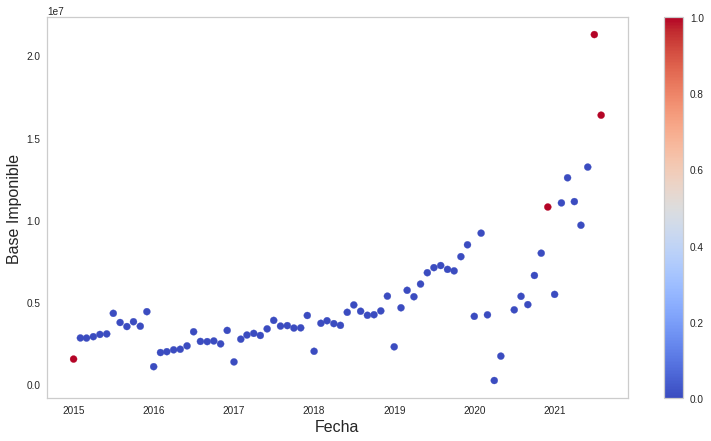

In [39]:
plt.figure(figsize = (13, 7))
s = plt.scatter(modelo04_results['fecha'], modelo04_results['base imponible'], 
                c = modelo04_results["Anomaly"], cmap = 'coolwarm')
plt.colorbar(s, label = '')
plt.xlabel('Fecha', fontsize = 16)
plt.ylabel('Base Imponible', fontsize = 16)
plt.grid()